<a href="https://colab.research.google.com/github/slajan01/mnist/blob/main/Kaggle_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from re import X
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv("/content/train.csv")
blank_data = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

In [52]:
X = data.drop("label", axis=1)
y = data["label"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
N_trid = len(set(y_train))
N_trid

10

In [55]:
X_train = np.array(X_train)
X_test = np.array(X_test)

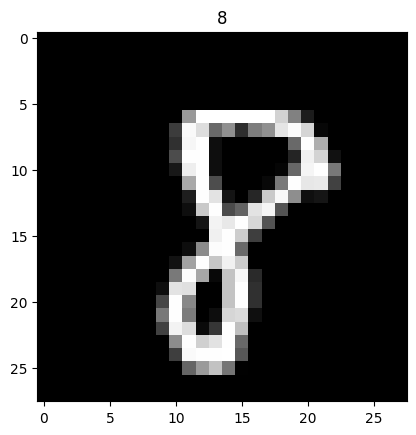

In [56]:
idx = 10
plt.title(y_train.iloc[idx])
plt.imshow(X_train[idx].reshape(28, 28), cmap="gray")
plt.show()

In [57]:
tvar_vstupu = X_test[0].shape
model = Sequential()

model.add(Input(shape=tvar_vstupu))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [58]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7914 - loss: 9.3017 - val_accuracy: 0.9125 - val_loss: 0.7414
Epoch 2/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9009 - loss: 0.8571 - val_accuracy: 0.9357 - val_loss: 0.3194
Epoch 3/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9272 - loss: 0.3575 - val_accuracy: 0.9393 - val_loss: 0.2370
Epoch 4/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9324 - loss: 0.2846 - val_accuracy: 0.9446 - val_loss: 0.2429
Epoch 5/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9357 - loss: 0.2718 - val_accuracy: 0.9426 - val_loss: 0.2791
Epoch 6/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9373 - loss: 0.2676 - val_accuracy: 0.9461 - val_loss: 0.2460
Epoch 7/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9380 - loss: 0.2717 - val_accuracy: 0.9479 - val_loss: 0.2671
Epoch 8/30
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9394 - loss: 0.2628 - val_accuracy: 0.

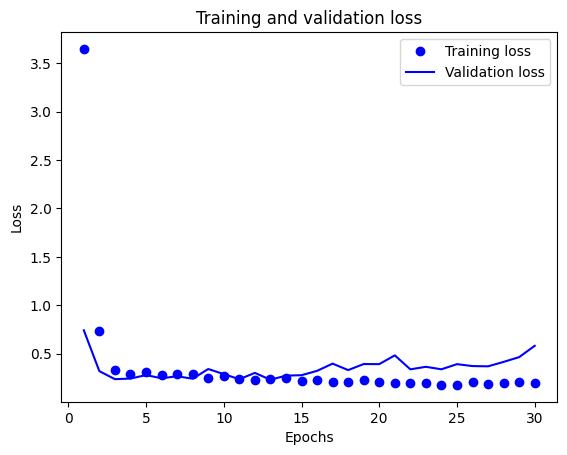

In [60]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

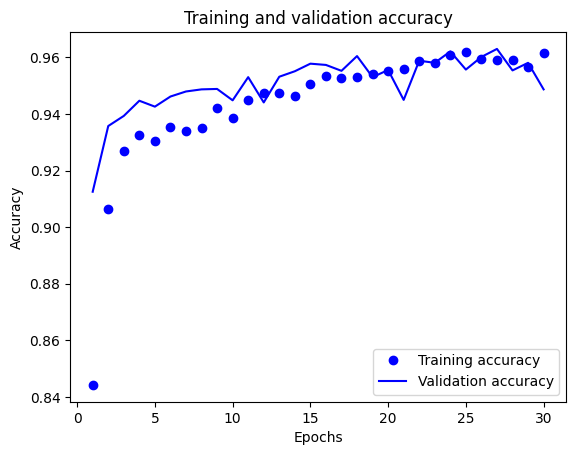

In [61]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [62]:
predictions = model.predict(blank_data)
predictions_1d = predictions.argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [63]:
output = pd.DataFrame({'ImageId': sample_submission.ImageId, 'Label': predictions_1d})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [16]:
import keras_tuner
import keras

In [21]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=X_test[0].shape))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units1', min_value=256, max_value=1024, step=128), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=512, max_value=2048, step=128), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(X_train, y_train, epochs=30, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units in first dense layer: {best_hps.get('units1')}")
print(f"Best dropout rate for first dropout layer: {best_hps.get('dropout1')}")
print(f"Best number of units in second dense layer: {best_hps.get('units2')}")
print(f"Best dropout rate for second dropout layer: {best_hps.get('dropout2')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

Trial 30 Complete [00h 03m 11s]
val_accuracy: 0.9578869342803955

Best val_accuracy So Far: 0.9680059552192688
Total elapsed time: 01h 01m 24s
Best number of units in first dense layer: 1024
Best dropout rate for first dropout layer: 0.2
Best number of units in second dense layer: 1152
Best dropout rate for second dropout layer: 0.30000000000000004
Best learning rate: 0.0001
